<a href="https://colab.research.google.com/github/jjyothika15/IBM_Internship/blob/main/salary_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install streamlit pyngrok --quiet


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib
from sklearn.pipeline import Pipeline


In [45]:
# Load dataset
data = pd.read_csv("/content/adult 3.csv")

# Replace '?' with NaN and drop rows with missing values
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Remove less informative or rare categories
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]
data = data[~data['education'].isin(['5th-6th', '1st-4th', 'Preschool'])]

# Drop redundant column
data.drop(columns=['education'], inplace=True)


data.head()


,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


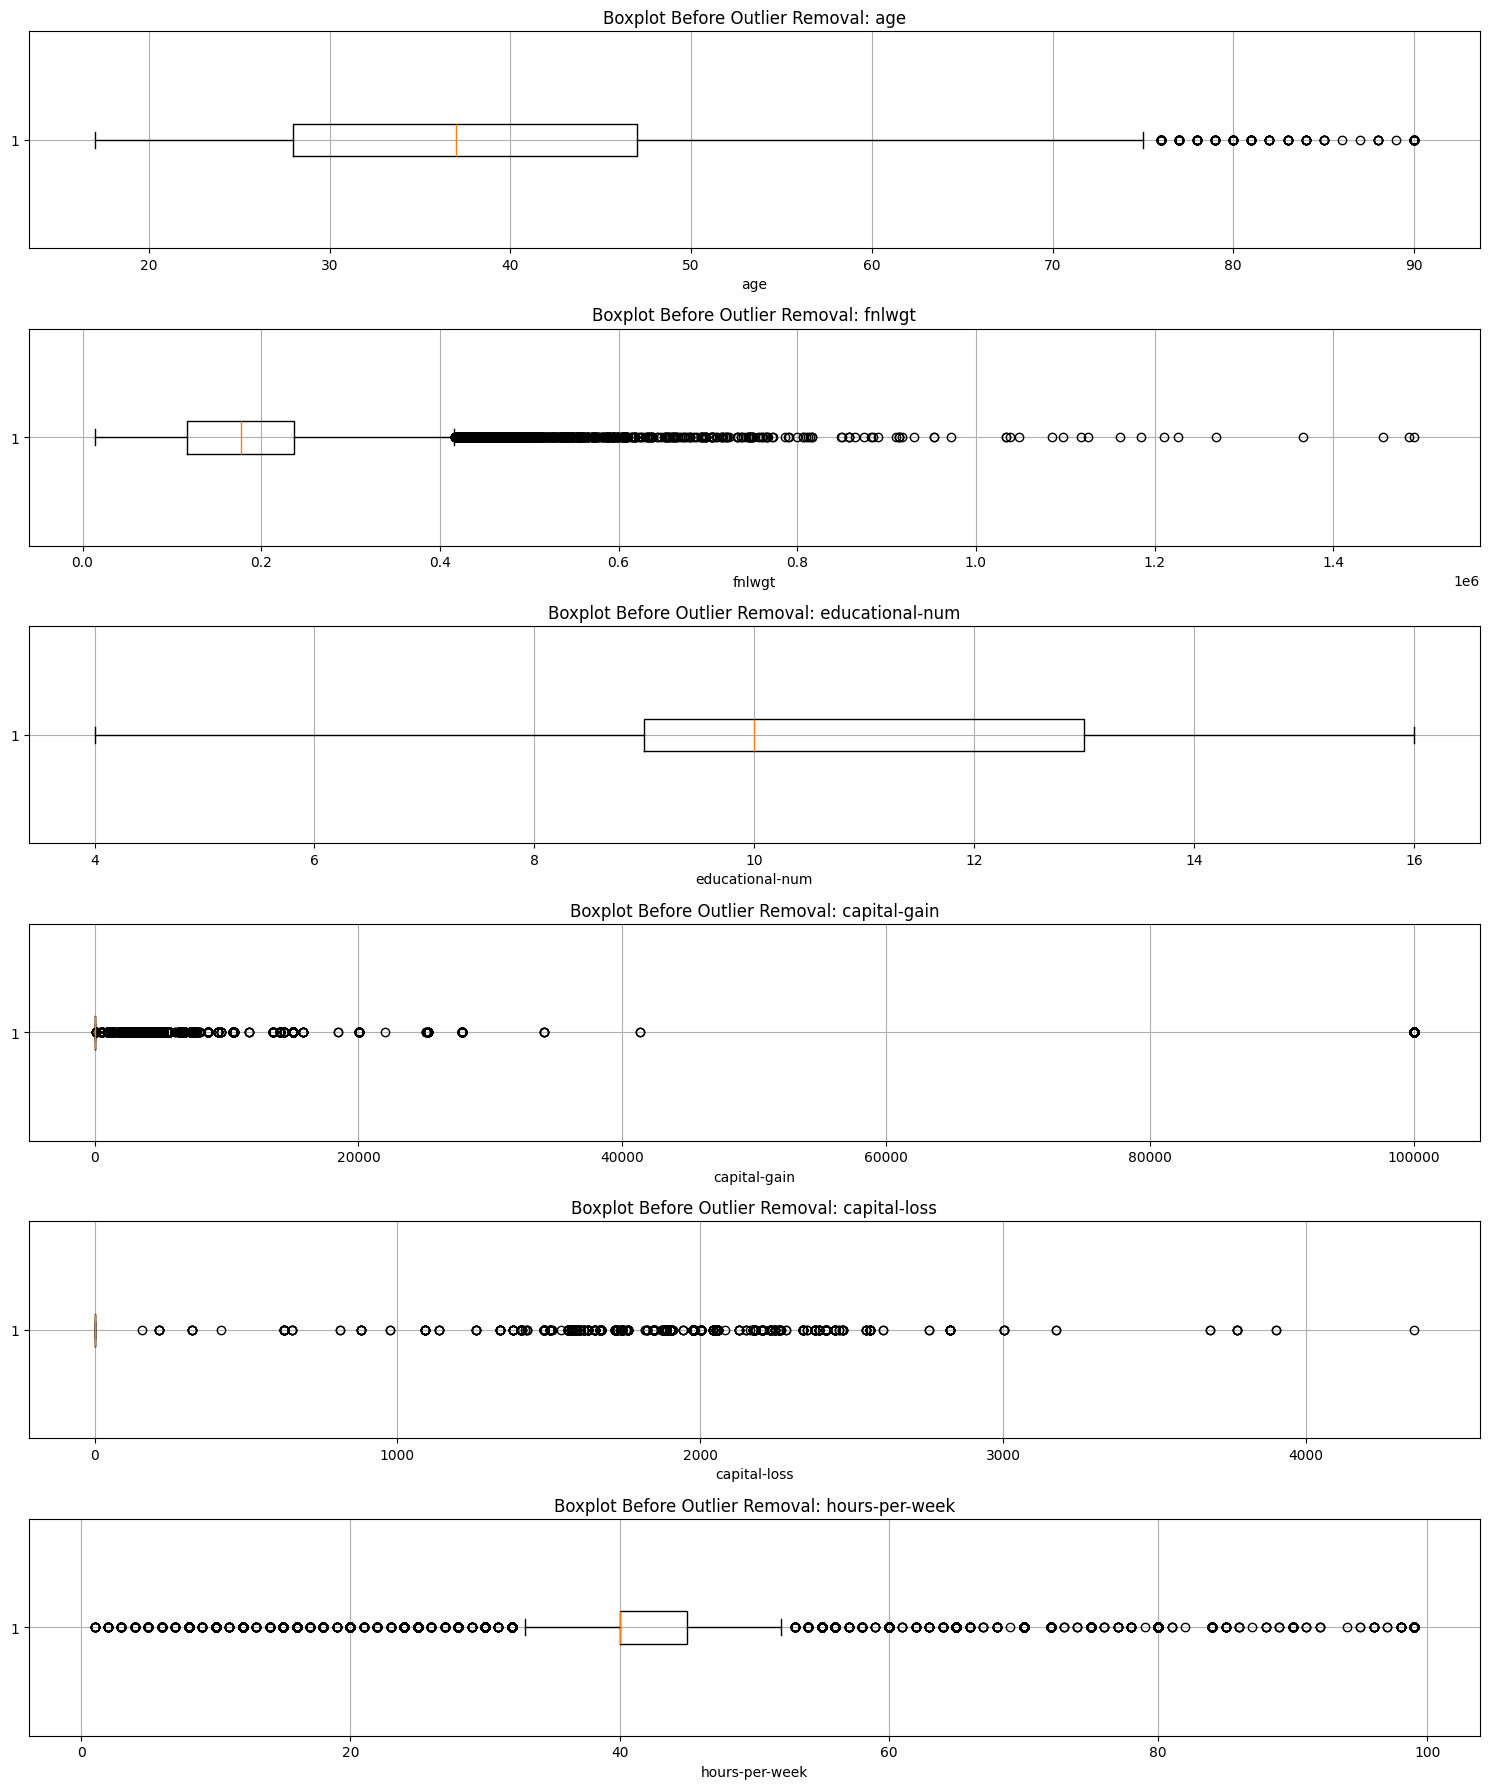

In [46]:
import matplotlib.pyplot as plt

# Get numeric columns only
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot boxplots before outlier removal
plt.figure(figsize=(15, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(len(numeric_cols), 1, i)
    plt.boxplot(data[col], vert=False)
    plt.title(f'Boxplot Before Outlier Removal: {col}')
    plt.xlabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [47]:
# IQR-based outlier removal
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col] <= upper)]


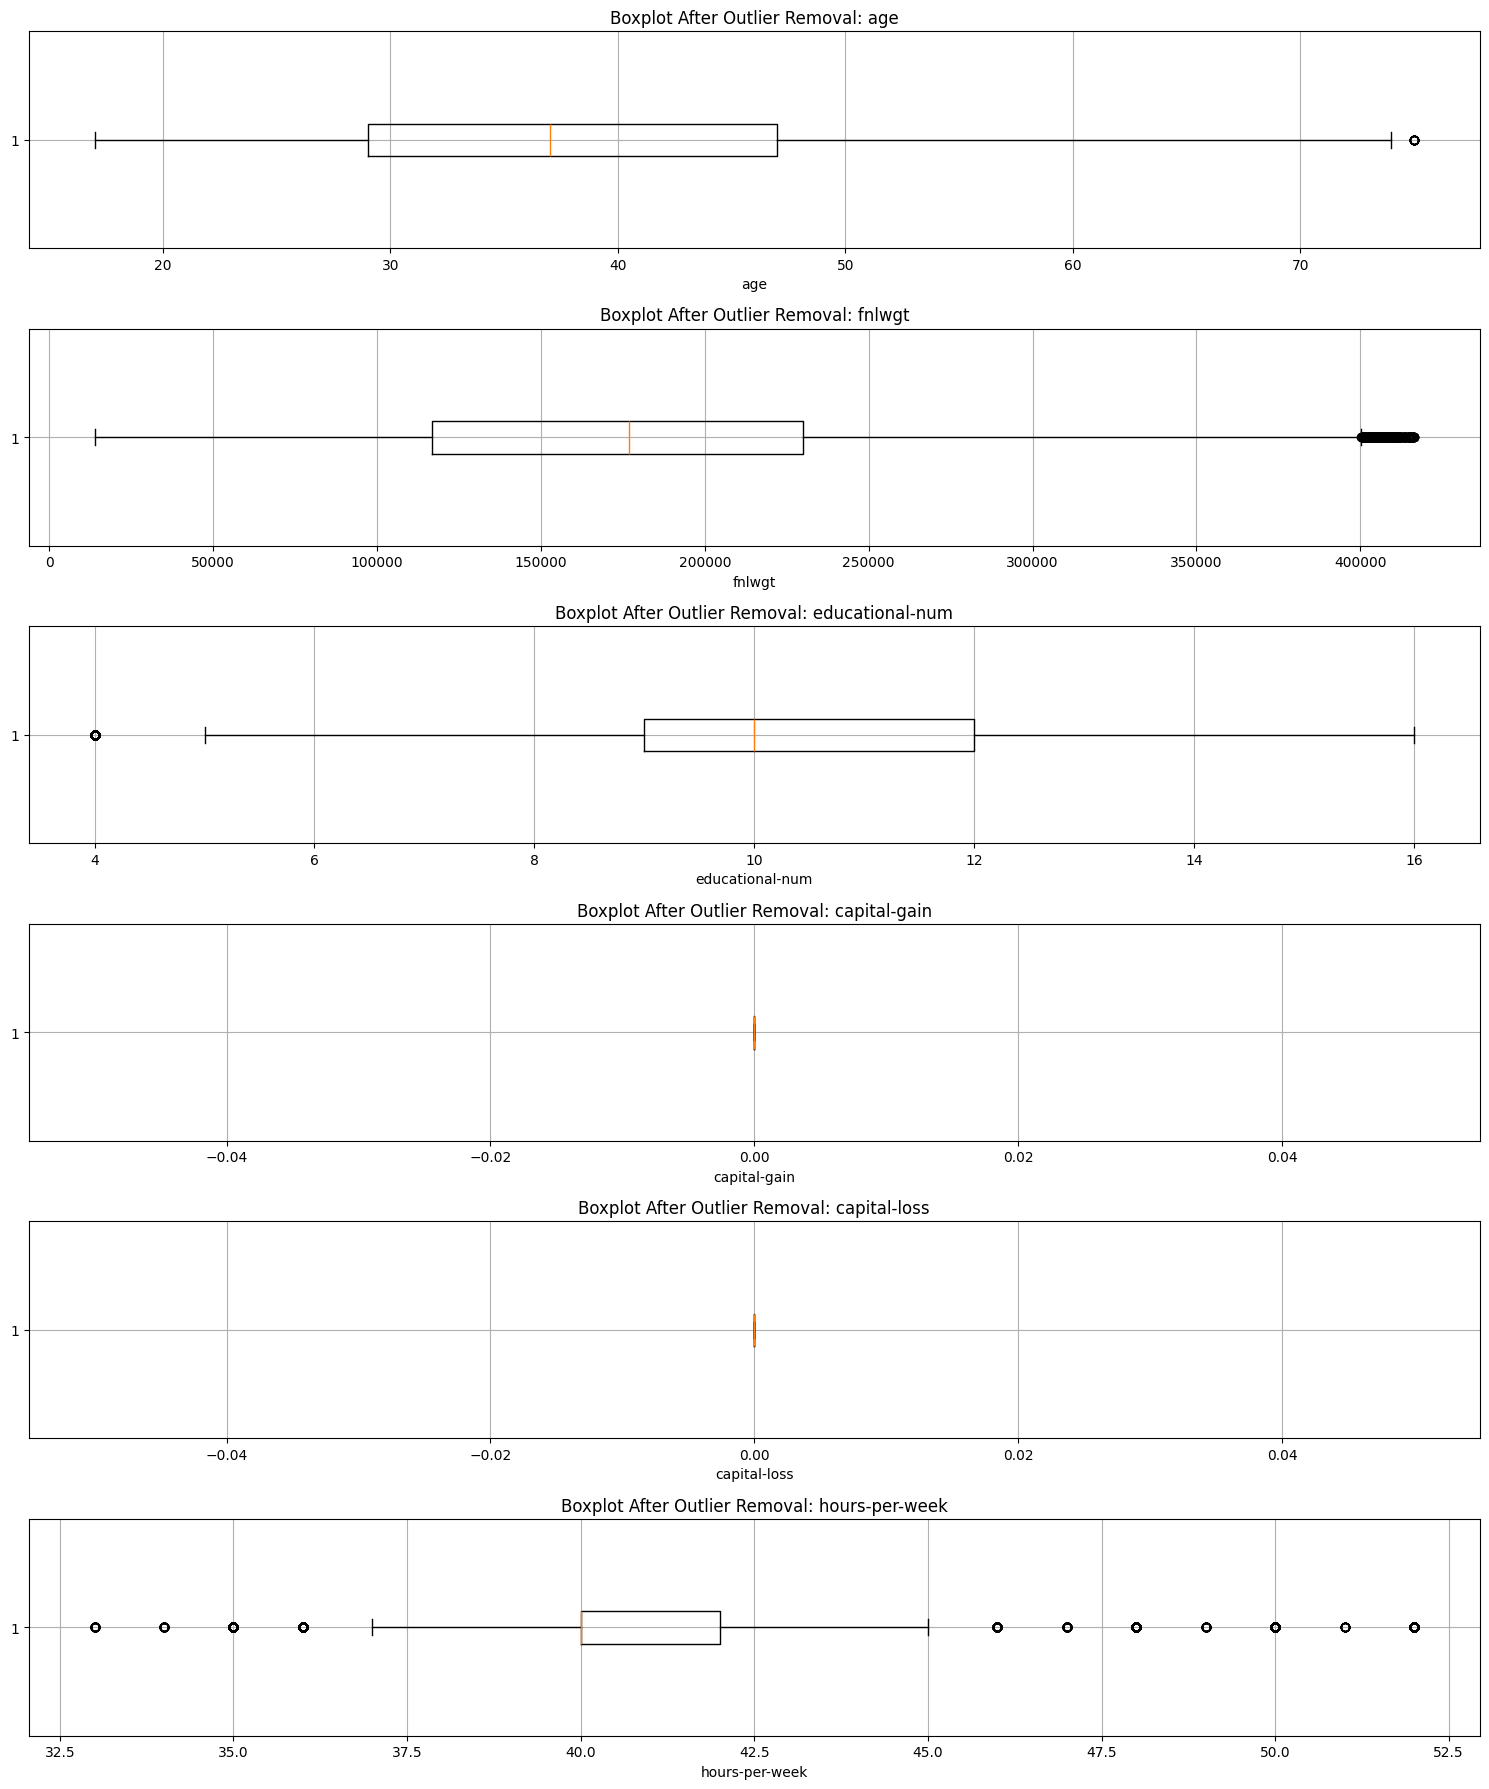

In [48]:
# Plot boxplots after outlier removal
plt.figure(figsize=(15, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(len(numeric_cols), 1, i)
    plt.boxplot(data[col], vert=False)
    plt.title(f'Boxplot After Outlier Removal: {col}')
    plt.xlabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [49]:
le = LabelEncoder()
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.head()



,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,89814,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,37,>50K
8,24,2,369667,10,4,7,4,4,0,0,0,40,37,<=50K
11,36,0,212465,13,2,0,0,4,1,0,0,40,37,<=50K


In [30]:
X = data.drop(columns=['income'])
y = data['income']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [50]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"\n{name}: {acc:.4f}")
    print(classification_report(y_test, preds))



LogisticRegression: 0.8187
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      6615
        >50K       0.71      0.47      0.57      2226

    accuracy                           0.82      8841
   macro avg       0.78      0.70      0.73      8841
weighted avg       0.81      0.82      0.80      8841


RandomForest: 0.8560
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      6615
        >50K       0.76      0.63      0.69      2226

    accuracy                           0.86      8841
   macro avg       0.82      0.78      0.80      8841
weighted avg       0.85      0.86      0.85      8841


KNN: 0.8202
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      6615
        >50K       0.66      0.58      0.62      2226

    accuracy                           0.82      8841
   macro avg       0.76      0.74      0.75      8841
weighted av

In [51]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, "best_model.pkl")
print(f"Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")


Best model: GradientBoosting with accuracy 0.8625


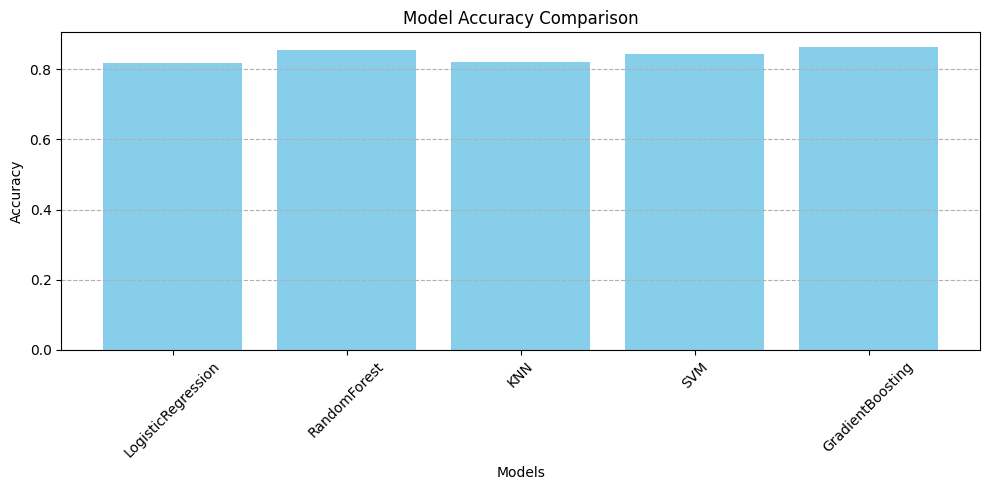

In [52]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


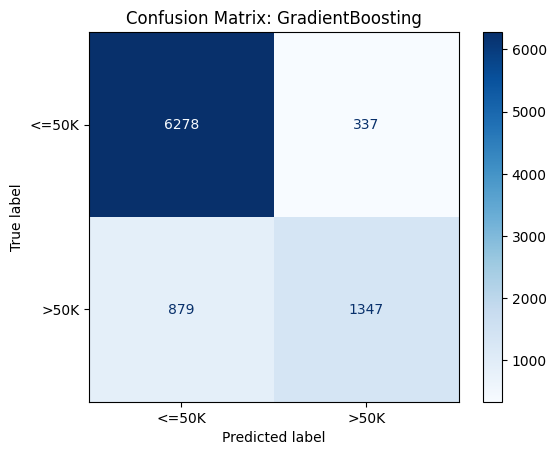

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()


In [54]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💰", layout="centered")

st.title("💰Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or <=50K based on input features.")

st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 75, 30)
workclass = st.sidebar.selectbox("Workclass", list(range(0, 8)))
marital_status = st.sidebar.selectbox("Marital Status", list(range(0, 7)))
occupation = st.sidebar.selectbox("Occupation", list(range(0, 14)))
relationship = st.sidebar.selectbox("Relationship", list(range(0, 6)))
race = st.sidebar.selectbox("Race", list(range(0, 5)))
gender = st.sidebar.selectbox("Gender", [0, 1])
hours_per_week = st.sidebar.slider("Hours Worked Per Week", 0, 80, 40)
native_country = st.sidebar.selectbox("Native Country", list(range(0, 41)))

input_df = pd.DataFrame([[
    age, workclass, marital_status, occupation, relationship,
    race, gender, hours_per_week, native_country
]], columns=[
    'age', 'workclass', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'hours-per-week', 'native-country'
])

st.write("### Input Data")
st.write(input_df)

if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"Prediction: {prediction[0]}")


Overwriting app.py


In [56]:
!ngrok config add-authtoken 30QHMeM1i9pRPCBel8cgQbTMfts_5djzXMLHqK4B3xZnpm8Do


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [57]:
from pyngrok import ngrok
import os
import threading
import time

def run_app():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_app)
thread.start()

time.sleep(5)  # Wait for the server to start
public_url = ngrok.connect(8501)
print(f"🌐 Your Streamlit app is live at: {public_url}")


🌐 Your Streamlit app is live at: NgrokTunnel: "https://9ad536ccd3e4.ngrok-free.app" -> "http://localhost:8501"
